In [8]:
import matplotlib.pyplot as plt
from MIC import *
from math import sqrt, pi
import numpy as np

# Estimate Local Dependence Function with Kernels

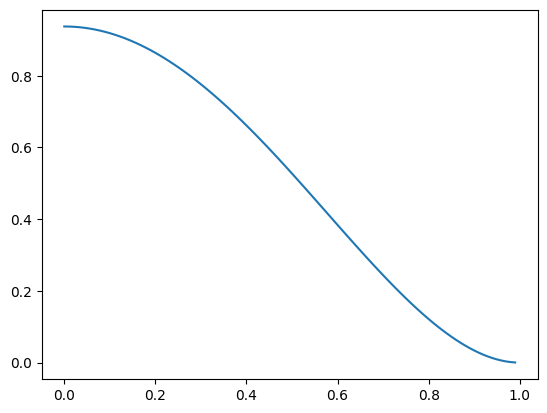

In [6]:
def biweight_univariate_density(u):
    return (15/16)*((1-u**2)**2)

plt.plot([u/100 for u in range(100)],[biweight_univariate_density(u/100) for u in range(100)])

In [9]:
kernel = biweight_univariate_density

In [122]:
def ldf_estimator(samples,x,y):
    n = len(samples)
    sigma1 = np.std(samples.T[0])#variance
    sigma2 = np.std(samples.T[1])#variance
    rho = np.corrcoef(samples.T)[0][1]#correlation 
    term1 = 5/7#gaussian kernelなら1/2sqrt(pi)
    term2 = 1/7#gaussian kernel なら1
    common = (2*sqrt(pi)*term1/term2)**(1/3)
    common *= (1-rho**2)**(5/12)
    common /= (1+rho**2/2)**(1/6)
    common /= n**(1/6)
    h1 = sigma1 * common
    h2 = sigma2 * common

    def g(i,j,samples_,x0,y0):
        res = []
        for k in range(n):
            Xk = samples_[k][0]
            Yk = samples_[k][1]     
            tmp = (Xk**i)*(Yk**j)*kernel((Xk-x0)/h1)*kernel((Yk-y0)/h2)
            res.append(tmp)
        return sum(res)/len(res)

    est = g(1,1,samples,x,y)-g(0,1,samples,x,y)*g(1,0,samples,x,y)/g(0,0,samples,x,y)
    est /= h1**2
    est /= h2**2
    est /= term2**2
    est /= g(0,0,samples,x,y)
    return est

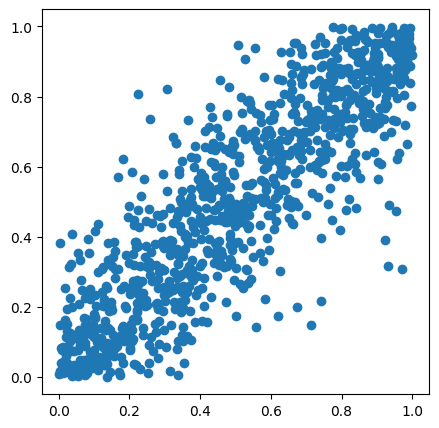

In [129]:
data = sampler.Invsamples_frank(theta=10,size=1000)
plt.figure(figsize=(5,5))
plt.scatter(data[:,0],data[:,1])

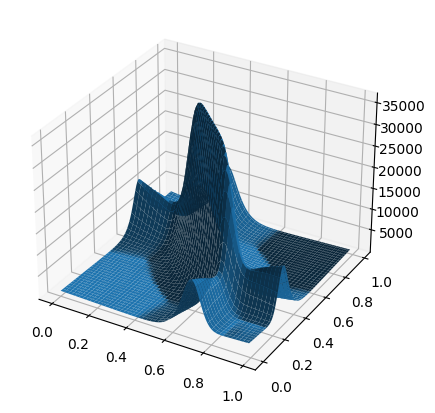

In [130]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


X, Y = np.mgrid[0:100, 0:100]/100
Z = ldf_estimator(data,X,Y)
fig = plt.figure(figsize=(5, 5), facecolor="w")
ax = fig.add_subplot(111, projection="3d")

surf = ax.plot_surface(X, Y, Z)

In [118]:
def frank(theta,u,v):
    psi_inv_u = -np.log(-np.exp(-theta*u)+1)+np.log(-np.exp(-theta)+1)
    psi_inv_v = -np.log(-np.exp(-theta*v)+1)+np.log(-np.exp(-theta)+1)
    t = psi_inv_u + psi_inv_v
    y = -np.log(1-(1-np.exp(-theta))*np.exp(-t))/theta
    return y

def frank_density(theta,u,v):
    res = theta*(1-np.exp(-theta))*np.exp(-theta*(u+v))
    res /= (1-np.exp(-theta)-(1-np.exp(-theta*u))*(1-np.exp(-theta*v)))**2
    return res

def frank_ldf(theta,u,v):
    return frank_density(theta,u,v)*2*theta

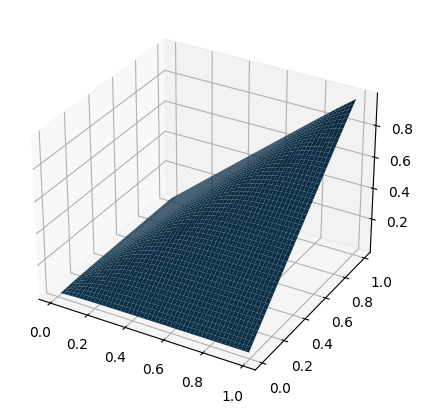

In [89]:
X, Y = np.mgrid[1:100, 1:100]/100
Z = frank(10,X,Y)
fig = plt.figure(figsize=(5, 5), facecolor="w")
ax = fig.add_subplot(111, projection="3d")

surf = ax.plot_surface(X, Y, Z)

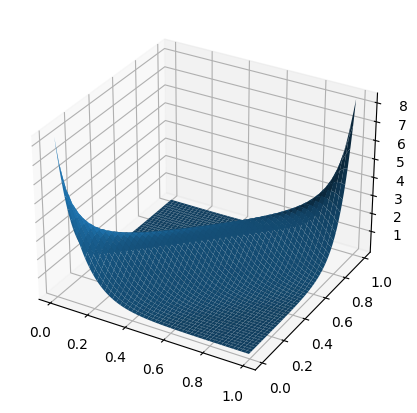

In [131]:
X, Y = np.mgrid[1:100, 1:100]/100
Z = frank_density(10,X,Y)
fig = plt.figure(figsize=(5, 5), facecolor="w")
ax = fig.add_subplot(111, projection="3d")

surf = ax.plot_surface(X, Y, Z)

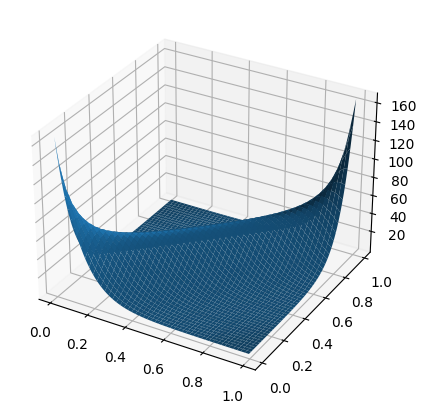

In [132]:
X, Y = np.mgrid[1:100, 1:100]/100
Z = frank_ldf(10,X,Y)
fig = plt.figure(figsize=(5, 5), facecolor="w")
ax = fig.add_subplot(111, projection="3d")

surf = ax.plot_surface(X, Y, Z)